## Importing required Libraries:

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# setting options to show maximum of row and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# disabling Warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
import MoneyLaundering_DataDescription as mld

In [3]:
print(dir(mld))

['Amount', 'IsFlaggedFraud', 'IsFraud', 'NameDest', 'NameOrig', 'NewbalanceDest', 'NewbalanceOrig', 'OldbalanceDest', 'OldbalanceOrg', 'Step', 'Type', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__']


## Importing Data:

In [4]:
df=pd.read_csv('Money Laundering.csv.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df.shape

(6362620, 11)

In [5]:
# Sample Data:

df.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4470210,324,PAYMENT,92.83,C305908703,0.0,0.0,M520111720,0.00,0.00,0,0
304240,15,CASH_OUT,30437.36,C1138740604,0.0,0.0,C156363230,828535.37,858972.73,0,0
4324802,308,PAYMENT,15558.59,C1515655144,0.0,0.0,M690911245,0.00,0.00,0,0
3231773,250,CASH_OUT,285504.58,C834927708,0.0,0.0,C1518748036,13502.07,299006.65,0,0
4157476,303,CASH_OUT,120183.17,C2102089862,0.0,0.0,C820327967,539345.66,659528.83,0,0


## EDA and Preprocessing:

In [5]:
# Defining required function definitions:

def num_cols(df):
    return df.select_dtypes(exclude='object').columns    # for fetching the numerical columns

def cat_cols(df):
    return df.select_dtypes(include='object').columns     # for fetching the categorical columns

# defining a function that will fetch the columns which have null values as index and the values, percentage of values and datatype as values:
# the function will return a series object:

def Null(df):
    return pd.Series([[df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)[i],
  str(np.round(df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)[i]*100/len(df),2))+' %',
  df[i].dtype] for i in df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False).index],
              index=[i for i in df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False).index])
    

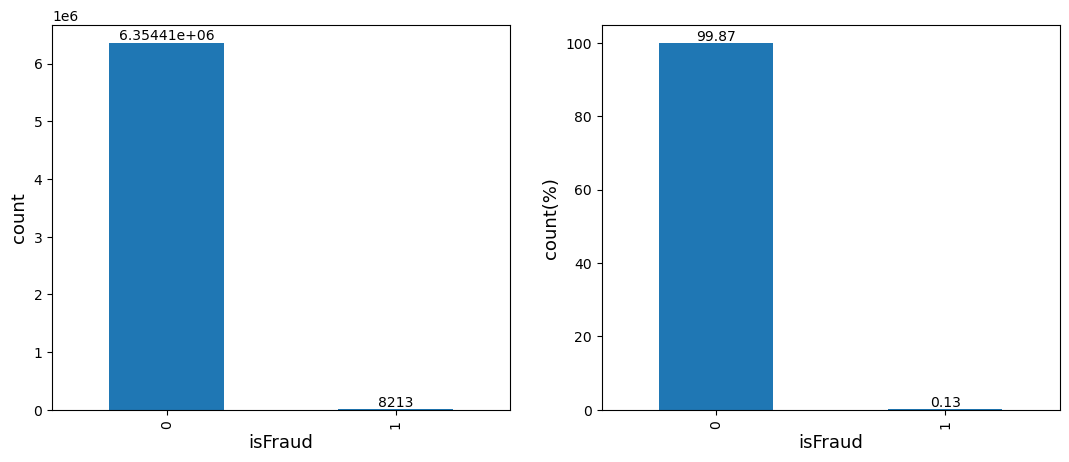

In [7]:
# Value Count of Target:

# (“1” means “Fraudelt Transaction”, “0” means “Normal Transaction”) 

plt.figure(figsize=(13,5),dpi=100)
plt.subplot(1,2,1)
ax=df.isFraud.value_counts().plot(kind='bar')

for j in ax.containers:
    ax.bar_label(j)


plt.xlabel('isFraud',fontsize=13)
plt.ylabel('count',fontsize=13)

plt.subplot(1,2,2)
ax=(df.isFraud.value_counts(normalize=True)*100).plot(kind='bar')

for j in ax.containers:
    ax.bar_label(j,fmt='%.2f')


plt.xlabel('isFraud',fontsize=13)
plt.ylabel('count(%)',fontsize=13)
plt.show()


* Target Columns is highly imbalanced.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [9]:
# Looking for missing values:

df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)

Series([], dtype: int64)

In [10]:
# Fetching a sample of the fraudulent data:

df[df.isFraud==1].sample(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4315436,308,CASH_OUT,6647155.99,C2030660606,6647155.99,0.0,C1098443300,0.00,6647155.99,1,0
6362522,735,TRANSFER,92735.71,C1351323617,92735.71,0.0,C413722554,0.00,0.00,1,0
2801097,219,TRANSFER,2312944.11,C1091954556,2312944.11,0.0,C2120902044,0.00,0.00,1,0
1932225,175,TRANSFER,87622.50,C344677665,87622.50,0.0,C1831197115,0.00,0.00,1,0
6362488,732,TRANSFER,311832.17,C65054182,311832.17,0.0,C833307608,0.00,0.00,1,0
6351238,703,CASH_OUT,13024.95,C1503196403,13024.95,0.0,C448117484,0.00,13024.95,1,0
4785652,341,TRANSFER,414394.38,C934172571,414394.38,0.0,C97161291,0.00,0.00,1,0
6018489,452,TRANSFER,63262.94,C1275005774,63262.94,0.0,C1128985646,0.00,0.00,1,0
6351303,705,CASH_OUT,105269.81,C1910128336,105269.81,0.0,C1345723287,1131176.09,1236445.90,1,0
6027392,470,TRANSFER,913684.05,C182934676,913684.05,0.0,C1568271281,0.00,0.00,1,0


In [11]:
print(mld.Amount())
print('\n')
print(mld.OldbalanceOrg())
print('\n')
print(mld.NewbalanceOrig())
print('\n')
print(mld.OldbalanceDest())
print('\n')
print(mld.NewbalanceDest())

Amount: Monetary value of the transaction in local currency.


OldbalanceOrg: Initial balance of the originator before the transaction.


NewbalanceOrig: New balance of the originator after the transaction.


OldbalanceDest: Initial balance of the recipient before the transaction. (Not available for merchants.)


NewbalanceDest: New balance of the recipient after the transaction. (Not available for merchants.)


In [12]:
# Checking new balance after fraudulent transaction:

df[df.isFraud==1].newbalanceOrig.value_counts()

0.00           8053
17316255.05       3
10399045.08       3
19585040.37       3
4953893.08        2
3171085.59        2
3441041.46        2
2542664.27        2
353874.22         2
3576297.10        2
4892193.09        2
536624.41         2
1343002.08        2
5674547.89        2
27670038.08       1
9887819.06        1
30399045.08       1
40399045.08       1
6468916.64        1
1576874.04        1
3120690.98        1
3020974.53        1
2626957.79        1
8594065.09        1
12542664.27       1
22542664.27       1
32542664.27       1
780687.45         1
987591.59         1
10353874.22       1
20353874.22       1
4830219.15        1
13576297.10       1
23576297.10       1
2629417.41        1
5999376.79        1
2625132.51        1
12625132.51       1
5912204.00        1
7239986.95        1
7041719.54        1
8020192.15        1
9593838.63        1
3695429.98        1
6484526.80        1
20399045.08       1
2140888.35        1
9228514.10        1
2113271.99        1
15674547.89       1


* There are total 8213 fraudulent transaction, out of which in 8053 numbers the remaining balance after the transaction is 0. This is a good indicator of fraudulent transaction.

In [13]:
# Checking new balance after fraudulent transaction:

df[df.isFraud==0].newbalanceOrig.value_counts().head()

0.00        3601513
20981.68          4
31285.61          4
17979.82          4
4019.43           4
Name: newbalanceOrig, dtype: int64

* new balance of the originator is 0 3601513 times after transaction which is not fraud.

In [14]:
df[df.isFraud==0].shape

(6354407, 11)

* In normal transactions almost half of them have no remaining balance in their account.

In [15]:
# Data Description of Step Column:

mld.Step()

'Step: Represents a unit of time in hours. The dataset spans 30 days (744 steps).'

In [16]:
df[df.isFraud==1].step.describe()

count    8213.000000
mean      368.413856
std       216.388690
min         1.000000
25%       181.000000
50%       367.000000
75%       558.000000
max       743.000000
Name: step, dtype: float64

<AxesSubplot:xlabel='step'>

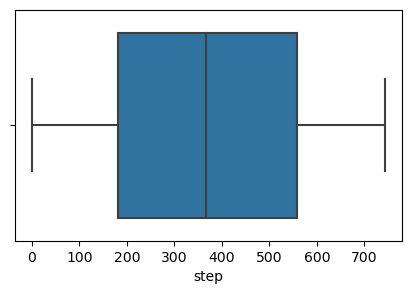

In [17]:
plt.figure(figsize=(5,3),dpi=100)
sns.boxplot(data=df[df.isFraud==1],x='step')

* the step value for fraudulent transactions ranges between 1-743.

In [18]:
mld.Type()

'Type: Type of transaction - can be CASH-IN, CASH-OUT, DEBIT, PAYMENT, or TRANSFER.'

In [19]:
# Value_counts of type:

df.type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [20]:
# Checking mode of transaction in fraudulent transaction:

df[df.isFraud==1].type.value_counts()

CASH_OUT    4116
TRANSFER    4097
Name: type, dtype: int64

* This Column is also a good indicator of fraudulent transaction.

In [21]:
# Fetching value counts of target when type is cashout and newbalanceOrig is 0 and step==367:

df[(df.type=='CASH_OUT') & (df.newbalanceOrig==0) & (df.step==367)]['isFraud'].value_counts()

1    7
Name: isFraud, dtype: int64

In [22]:
# Fetching value counts of target when type is TRANSFER and newbalanceOrig is 0 and step==181:

df[(df.type=='TRANSFER') & (df.newbalanceOrig==0) & (df.step==181)]['isFraud'].value_counts()

0    2618
1       5
Name: isFraud, dtype: int64

In [23]:
df[df.isFraud==1]['oldbalanceOrg'].value_counts()

10000000.00    142
0.00            41
1165187.89       4
429257.45        4
181.00           2
1290619.25       2
1610110.66       2
609400.88        2
214793.32        2
4505012.56       2
1205760.86       2
143500.62        2
471906.60        2
1425802.24       2
2755588.11       2
53107.96         2
277485.25        2
321307.31        2
882637.83        2
26654.46         2
367980.99        2
1035401.20       2
50279.40         2
27696.89         2
326052.83        2
5363795.31       2
101081.12        2
934314.89        2
7515624.63       2
107128.17        2
177925.98        2
1189986.88       2
4241.44          2
3351304.78       2
67692.41         2
156220.74        2
1927403.83       2
2254718.25       2
829286.58        2
51183.25         2
6669495.34       2
799517.33        2
146743.13        2
181104.66        2
644781.76        2
130668.56        2
305183.84        2
190215.18        2
832811.84        2
1710180.37       2
20296.68         2
548677.33        2
732198.35   

* for fraudulent transaction old balace was 0 41 times.

In [24]:
df[df.isFraud==0]['oldbalanceOrg'].value_counts().head()

0.0      2102408
184.0        918
133.0        914
195.0        912
109.0        908
Name: oldbalanceOrg, dtype: int64

* for normal transaction old balance was 0 2102408 times which is:

In [25]:
np.round(2102408*100/6354407,2)  # Percent

33.09

In [26]:
df[(df.oldbalanceOrg==0) & (df.newbalanceOrig==0)]['isFraud'].value_counts()

0    2088944
1         41
Name: isFraud, dtype: int64

In [27]:
df.oldbalanceOrg.describe()

count    6.362620e+06
mean     8.338831e+05
std      2.888243e+06
min      0.000000e+00
25%      0.000000e+00
50%      1.420800e+04
75%      1.073152e+05
max      5.958504e+07
Name: oldbalanceOrg, dtype: float64

when old balance and new balance both are 0 then no of fraudulent transactions are very less only 41 times.

In [28]:
# Fetching minimum, average,25% and maximum Value of oldbalanceOrg when isFraud is 1:

print('Value Count when isFraud is 1:',df[df.isFraud==1]['oldbalanceOrg'].describe()['count'])
print('Min Value of oldbalanceOrg when isFraud is 1: ',df[df.isFraud==1]['oldbalanceOrg'].min())
print('25% Value of oldbalanceOrg when isFraud is 1: ',df[df.isFraud==1]['oldbalanceOrg'].describe()['25%'])
print('Mean Value of oldbalanceOrg when isFraud is 1: ',df[df.isFraud==1]['oldbalanceOrg'].mean())
print('50% Value of oldbalanceOrg when isFraud is 1: ',df[df.isFraud==1]['oldbalanceOrg'].describe()['50%'])
print('75% Value of oldbalanceOrg when isFraud is 1: ',df[df.isFraud==1]['oldbalanceOrg'].describe()['75%'])
print('Max Value of oldbalanceOrg when isFraud is 1: ',df[df.isFraud==1]['oldbalanceOrg'].max())
print('Standard Deviation when isFraud is 1:',df[df.isFraud==1]['oldbalanceOrg'].describe()['std'])

Value Count when isFraud is 1: 8213.0
Min Value of oldbalanceOrg when isFraud is 1:  0.0
25% Value of oldbalanceOrg when isFraud is 1:  125822.44
Mean Value of oldbalanceOrg when isFraud is 1:  1649667.6057116783
50% Value of oldbalanceOrg when isFraud is 1:  438983.45
75% Value of oldbalanceOrg when isFraud is 1:  1517771.48
Max Value of oldbalanceOrg when isFraud is 1:  59585040.37
Standard Deviation when isFraud is 1: 3547719.439109126


In [29]:
# Fetching minimum, average and maximum Value of oldbalanceOrg when isFraud is 0:

print('Value Count when isFraud is 0:',df[df.isFraud==0]['oldbalanceOrg'].describe()['count'])
print('Min Value of oldbalanceOrg when isFraud is 0: ',df[df.isFraud==0]['oldbalanceOrg'].min())
print('25% Value of oldbalanceOrg when isFraud is 0: ',df[df.isFraud==0]['oldbalanceOrg'].describe()['25%'])
print('Mean Value of oldbalanceOrg when isFraud is 0: ',df[df.isFraud==0]['oldbalanceOrg'].mean())
print('50% Value of oldbalanceOrg when isFraud is 0: ',df[df.isFraud==0]['oldbalanceOrg'].describe()['50%'])
print('Max Value of oldbalanceOrg when isFraud is 0: ',df[df.isFraud==0]['oldbalanceOrg'].max())
print('Standard Deviation when isFraud is 0:',df[df.isFraud==0]['oldbalanceOrg'].describe()['std'])

Value Count when isFraud is 0: 6354407.0
Min Value of oldbalanceOrg when isFraud is 0:  0.0
25% Value of oldbalanceOrg when isFraud is 0:  0.0
Mean Value of oldbalanceOrg when isFraud is 0:  832828.7117272562
50% Value of oldbalanceOrg when isFraud is 0:  14069.0
Max Value of oldbalanceOrg when isFraud is 0:  43818855.3
Standard Deviation when isFraud is 0: 2887144.03036968


* fraud is happening when amount is low in oldbalanceOrg: mean amount is 1649667.6

In [30]:
# Let's check for newbalanceOrig:

# Fetching minimum, average,25% and maximum Value of newbalanceOrig when isFraud is 1:

print('Value Count when isFraud is 1:',df[df.isFraud==1]['newbalanceOrig'].describe()['count'])
print('Min Value of newbalanceOrig when isFraud is 1: ',df[df.isFraud==1]['newbalanceOrig'].min())
print('25% Value of newbalanceOrig when isFraud is 1: ',df[df.isFraud==1]['newbalanceOrig'].describe()['25%'])
print('Mean Value of newbalanceOrig when isFraud is 1: ',df[df.isFraud==1]['newbalanceOrig'].mean())
print('50% Value of newbalanceOrig when isFraud is 1: ',df[df.isFraud==1]['newbalanceOrig'].describe()['50%'])
print('75% Value of newbalanceOrig when isFraud is 1: ',df[df.isFraud==1]['newbalanceOrig'].describe()['75%'])
print('Max Value of newbalanceOrig when isFraud is 1: ',df[df.isFraud==1]['newbalanceOrig'].max())
print('Standard Deviation when isFraud is 1:',df[df.isFraud==1]['newbalanceOrig'].describe()['std'])

Value Count when isFraud is 1: 8213.0
Min Value of newbalanceOrig when isFraud is 1:  0.0
25% Value of newbalanceOrig when isFraud is 1:  0.0
Mean Value of newbalanceOrig when isFraud is 1:  192392.63183611343
50% Value of newbalanceOrig when isFraud is 1:  0.0
75% Value of newbalanceOrig when isFraud is 1:  0.0
Max Value of newbalanceOrig when isFraud is 1:  49585040.37
Standard Deviation when isFraud is 1: 1965666.4557190589


In [31]:
df[(df.isFraud==1) & (df.newbalanceOrig>0)]['newbalanceOrig'].shape

(160,)

* Only 160 people have balance left after fraudulent transaction which strats even after 75%th percentile.

In [32]:
df[(df.isFraud==1) & (df.newbalanceOrig>0)]['newbalanceOrig'].value_counts()

19585040.37    3
17316255.05    3
10399045.08    3
4953893.08     2
3171085.59     2
3441041.46     2
2542664.27     2
353874.22      2
3576297.10     2
4892193.09     2
536624.41      2
1343002.08     2
5674547.89     2
27670038.08    1
8594065.09     1
30399045.08    1
40399045.08    1
6468916.64     1
1576874.04     1
3120690.98     1
3020974.53     1
2626957.79     1
987591.59      1
12542664.27    1
22542664.27    1
32542664.27    1
780687.45      1
4830219.15     1
10353874.22    1
20353874.22    1
8931607.89     1
13576297.10    1
23576297.10    1
2629417.41     1
5999376.79     1
2625132.51     1
12625132.51    1
5912204.00     1
7239986.95     1
7041719.54     1
8020192.15     1
9593838.63     1
3695429.98     1
6484526.80     1
20399045.08    1
2140888.35     1
9228514.10     1
2113271.99     1
15674547.89    1
25674547.89    1
35674547.89    1
1314660.84     1
1810044.85     1
298767.61      1
27316255.05    1
37316255.05    1
47316255.05    1
9749042.95     1
390763.24     

In [33]:
df.isFlaggedFraud.value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [34]:
df[df.isFraud==1].isFlaggedFraud.value_counts()

0    8197
1      16
Name: isFlaggedFraud, dtype: int64

* Out of 8213 farudulent transactions only 16 has been flagged as fraud

In [35]:
# Fetching minimum, average,25% and maximum Value of newbalanceOrig when isFlaggedFraud is 1:

print('Value Count when isFlaggedFraud is 1:',df[df.isFlaggedFraud==1]['newbalanceOrig'].describe()['count'])
print('Min Value of newbalanceOrig when isFlaggedFraud is 1: ',df[df.isFlaggedFraud==1]['newbalanceOrig'].min())
print('25% Value of newbalanceOrig when isFlaggedFraud is 1: ',df[df.isFlaggedFraud==1]['newbalanceOrig'].describe()['25%'])
print('Mean Value of newbalanceOrig when isFlaggedFraud is 1: ',df[df.isFlaggedFraud==1]['newbalanceOrig'].mean())
print('50% Value of newbalanceOrig when isFlaggedFraud is 1: ',df[df.isFlaggedFraud==1]['newbalanceOrig'].describe()['50%'])
print('75% Value of newbalanceOrig when isFlaggedFraud is 1: ',df[df.isFlaggedFraud==1]['newbalanceOrig'].describe()['75%'])
print('Max Value of newbalanceOrig when isFlaggedFraud is 1: ',df[df.isFlaggedFraud==1]['newbalanceOrig'].max())
print('Standard Deviation when isFlaggedFraud is 1:',df[df.isFlaggedFraud==1]['newbalanceOrig'].describe()['std'])

Value Count when isFlaggedFraud is 1: 16.0
Min Value of newbalanceOrig when isFlaggedFraud is 1:  353874.22
25% Value of newbalanceOrig when isFlaggedFraud is 1:  3013980.26
Mean Value of newbalanceOrig when isFlaggedFraud is 1:  7817869.011875
50% Value of newbalanceOrig when isFlaggedFraud is 1:  4923043.085
75% Value of newbalanceOrig when isFlaggedFraud is 1:  12128347.5725
Max Value of newbalanceOrig when isFlaggedFraud is 1:  19585040.37
Standard Deviation when isFlaggedFraud is 1: 6972668.533124547


In [36]:
# Fetching minimum, average and maximum Value of oldbalanceOrg when isFlaggedFraud is 0:

print('Value Count when isFlaggedFraud is 1:',df[df.isFlaggedFraud==1]['oldbalanceOrg'].describe()['count'])
print('Min Value of oldbalanceOrg when isFlaggedFraud is 1: ',df[df.isFlaggedFraud==1]['oldbalanceOrg'].min())
print('25% Value of oldbalanceOrg when isFlaggedFraud is 1: ',df[df.isFlaggedFraud==1]['oldbalanceOrg'].describe()['25%'])
print('Mean Value of oldbalanceOrg when isFlaggedFraud is 1: ',df[df.isFlaggedFraud==1]['oldbalanceOrg'].mean())
print('50% Value of oldbalanceOrg when isFlaggedFraud is 1: ',df[df.isFlaggedFraud==1]['oldbalanceOrg'].describe()['50%'])
print('Max Value of oldbalanceOrg when isFlaggedFraud is 1: ',df[df.isFlaggedFraud==1]['oldbalanceOrg'].max())
print('Standard Deviation when isFlaggedFraud is 1:',df[df.isFlaggedFraud==1]['oldbalanceOrg'].describe()['std'])

Value Count when isFlaggedFraud is 1: 16.0
Min Value of oldbalanceOrg when isFlaggedFraud is 1:  353874.22
25% Value of oldbalanceOrg when isFlaggedFraud is 1:  3013980.26
Mean Value of oldbalanceOrg when isFlaggedFraud is 1:  7817869.011875
50% Value of oldbalanceOrg when isFlaggedFraud is 1:  4923043.085
Max Value of oldbalanceOrg when isFlaggedFraud is 1:  19585040.37
Standard Deviation when isFlaggedFraud is 1: 6972668.533124547


In [37]:
df[df.isFlaggedFraud==1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


* In each row no change of balance is observed though this transaction has been flagged as fraudulent.

* oldbalanceOrg and newbalanceOrig are equal to amount and oldbalanceDest and newbalanceDest are 0.

In [38]:
print(mld.IsFlaggedFraud())

IsFlaggedFraud: Indicates whether the transaction was flagged as an attempt to transfer more than 200,000 in a single transaction.

    This flag is part of a business rule aimed at identifying and controlling massive transfers that could indicate money laundering or other illegal activities.


* flagging will start if the amount is more than 200,000

* minimum fraudulent transaction for when flag is raised starts from 353874.22 which is greater than 200000

In [39]:
df[df.amount==0]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736447,212,CASH_OUT,0.0,C1510987794,0.0,0.0,C1696624817,0.00,0.00,1,0
3247298,250,CASH_OUT,0.0,C521393327,0.0,0.0,C480398193,0.00,0.00,1,0
3760289,279,CASH_OUT,0.0,C539112012,0.0,0.0,C1106468520,538547.63,538547.63,1,0
5563714,387,CASH_OUT,0.0,C1294472700,0.0,0.0,C1325541393,7970766.57,7970766.57,1,0
5996408,425,CASH_OUT,0.0,C832555372,0.0,0.0,C1462759334,76759.90,76759.90,1,0
5996410,425,CASH_OUT,0.0,C69493310,0.0,0.0,C719711728,2921531.34,2921531.34,1,0
6168500,554,CASH_OUT,0.0,C10965156,0.0,0.0,C1493336195,230289.66,230289.66,1,0
6205440,586,CASH_OUT,0.0,C1303719003,0.0,0.0,C900608348,1328472.86,1328472.86,1,0
6266414,617,CASH_OUT,0.0,C1971175979,0.0,0.0,C1352345416,0.00,0.00,1,0
6281483,646,CASH_OUT,0.0,C2060908932,0.0,0.0,C1587892888,0.00,0.00,1,0


* when amount is 0 oldbalanceOrg and newbalanceOrig are 0 and value of oldbalanceDest and newbalanceDest are equal and still these are fraudulent transaction according to data.

In [40]:
df[(df.amount!=0) & (df.isFraud==1)].sample(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6186776,568,CASH_OUT,112988.36,C898478782,112988.36,0.0,C1897016446,70859.52,183847.89,1,0
1511331,148,CASH_OUT,394886.13,C1897206044,394886.13,0.0,C398205372,840653.68,1235539.81,1,0
6292350,665,TRANSFER,454483.23,C956916023,454483.23,0.0,C1172004131,0.00,0.00,1,0
1030326,56,CASH_OUT,530733.43,C1486070505,530733.43,0.0,C1428831661,233066.99,763800.42,1,0
1030416,63,CASH_OUT,197226.65,C1388614734,197226.65,0.0,C693288034,0.00,197226.65,1,0
6039449,481,TRANSFER,832811.84,C1215783470,832811.84,0.0,C1131260473,0.00,0.00,1,0
6018979,455,TRANSFER,338083.76,C2093423573,338083.76,0.0,C1147445635,0.00,0.00,1,0
3960260,291,TRANSFER,145035.40,C410161307,145035.40,0.0,C2092567505,0.00,0.00,1,0
1030515,69,TRANSFER,2960254.17,C833989982,2960254.17,0.0,C1897067419,0.00,0.00,1,0
6055691,499,TRANSFER,488243.65,C2117568077,488243.65,0.0,C1238599279,0.00,0.00,1,0


In [41]:
df[df.isFraud==1].sample(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3605544,264,TRANSFER,7304.56,C1550599239,7304.56,0.0,C993958869,0.00,0.00,1,0
2380616,193,TRANSFER,113273.10,C1707545075,113273.10,0.0,C700261838,0.00,0.00,1,0
6276609,638,CASH_OUT,5101855.95,C2134692608,5101855.95,0.0,C775400277,145922.42,5247778.37,1,0
2676016,210,CASH_OUT,1663895.14,C278631744,1663895.14,0.0,C542333894,0.00,1663895.14,1,0
7155,6,CASH_OUT,13704.00,C1421965867,13704.00,0.0,C1438594533,3382.84,143675.35,1,0
410906,18,CASH_OUT,1102133.90,C1213142549,1102133.90,0.0,C1880832297,306228.56,1408362.45,1,0
2780720,214,CASH_OUT,2485467.28,C159949095,2485467.28,0.0,C2133680119,0.00,2485467.28,1,0
4776,4,CASH_OUT,86070.17,C1699873763,86070.17,0.0,C560041895,0.00,86070.17,1,0
2786462,215,TRANSFER,9453680.72,C1433301955,9453680.72,0.0,C929797843,0.00,0.00,1,0
3071554,235,CASH_OUT,638487.85,C810576421,638487.85,0.0,C393990898,0.00,638487.85,1,0


## Correlation:

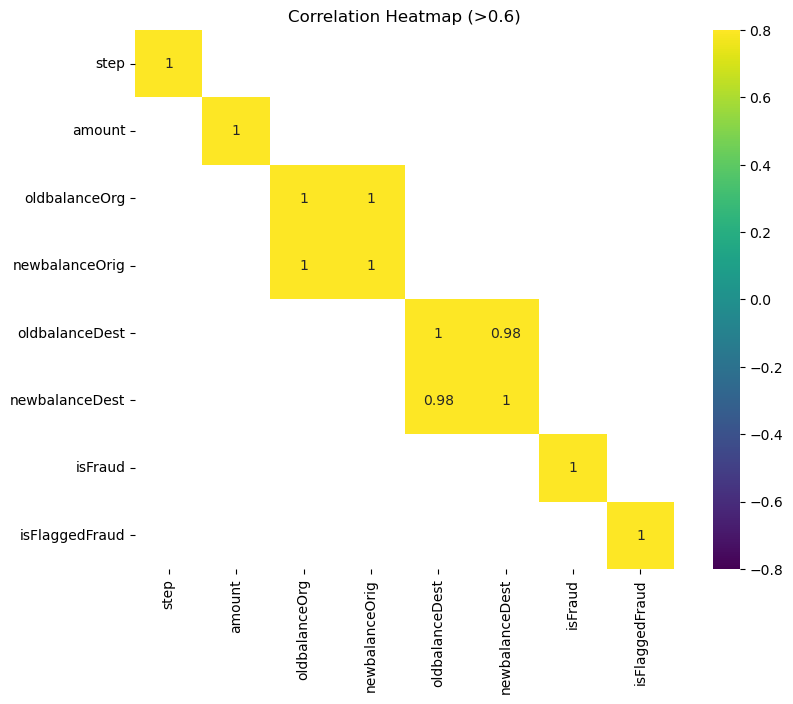

In [42]:
# Creating a mask for correlations greater than 0.6 or less than -0.6

corr_matrix = df.corr()

# Create a mask for correlations greater than 0.5 or less than -0.5
mask = (corr_matrix > 0.6) | (corr_matrix < -0.6)


plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix[mask], vmin=-0.8, vmax=0.8, square=True, annot=True, cmap='viridis')

plt.title("Correlation Heatmap (>0.6)")
plt.show()


* So oldbalanceOrg and newbalanceOrig; oldbalanceDest and	newbalanceDest are highly correlated with each other.

## Model Building:

In [6]:
# Importing required packages:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler,OneHotEncoder

In [7]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, classification_report,accuracy_score,log_loss,roc_auc_score
from sklearn.metrics import PrecisionRecallDisplay,precision_recall_curve,roc_auc_score,roc_curve

In [8]:
# Extraction of Features and Target from df:

X=df.drop(['nameOrig','nameDest','isFraud'],axis=1)
y=df.isFraud

In [9]:
# Label:
Label=[1,0]

In [10]:
# train_test_split:
# Using stratify sampling as the target column is heavily imbalanced:

X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=df['isFraud'], test_size=0.2,random_state=42)

In [11]:
print('Shape of X_train: ',X_train.shape)
print('Shape of y_train: ',y_train.shape)
print('Shape of X_test: ',X_test.shape)
print('Shape of y_test: ',y_test.shape)

Shape of X_train:  (5090096, 8)
Shape of y_train:  (5090096,)
Shape of X_test:  (1272524, 8)
Shape of y_test:  (1272524,)


In [12]:
print('Value Count of y_train: ')
print(np.round(y_train.value_counts(normalize=True)*100,2))
print('\n')
print('Value Count of y_test: ')
print(np.round(y_test.value_counts(normalize=True)*100,2))

Value Count of y_train: 
0    99.87
1     0.13
Name: isFraud, dtype: float64


Value Count of y_test: 
0    99.87
1     0.13
Name: isFraud, dtype: float64


In [13]:
print('Value Count of df.isFraud: ')
print(np.round(df.isFraud.value_counts(normalize=True)*100,2))

Value Count of df.isFraud: 
0    99.87
1     0.13
Name: isFraud, dtype: float64


## ML Pipeline:

In [14]:
# Defining a function definition which takes a list numerical and categorical features as arguements
# and constructs a preprocessor for Train and test data:

def Preprocessor(num_pre_cols,cat_pre_cols):

    # Preprocessor:
    numeric_features = num_pre_cols
    numeric_transformer = Pipeline(
        steps=[("scaler", MinMaxScaler())]
    )
    
    categorical_features = cat_pre_cols
    categorical_transformer = Pipeline(
        steps=[
            ("encoder", OneHotEncoder(drop='first',sparse=False,handle_unknown="ignore"))
        ]
    )
    preprocessor = ColumnTransformer(
        transformers=[
            ("num", numeric_transformer, numeric_features),
            ("cat", categorical_transformer, categorical_features)
        ]
    )

    return preprocessor

    

In [15]:
# Creating a function definition for prediction using pipeline:

def Pipe_Prediction(X_train,X_test,y_train,y_test,num_pre_cols,cat_pre_cols,model,Label):
    for i in model:
        
        clf = Pipeline(
            steps=[("preprocessor", Preprocessor(num_pre_cols,cat_pre_cols)), ("classifier", i)])
    
        # fitting:
        clf.fit(X_train, y_train)
        
        print(f'{i} : ')
        print('\t')
        
    
        
        # prediction:
        y_train_pred=clf.predict(X_train)
        y_test_pred=clf.predict(X_test)
        
        # accuracy_score(%):
        print('Accuracy_Score of Train: ',np.round(accuracy_score(y_train,y_train_pred)*100,2),'%')
        print('Accuracy_Score of Test: ',np.round(accuracy_score(y_test,y_test_pred)*100,2),'%')
        print('\t')
        print('ROC_AUC_Score of Train: ',np.round(roc_auc_score(y_train, clf.predict_proba(X_train)[:, 1])*100,2),'%')
        print('ROC_AUC_Score of Test: ',np.round(roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])*100,2),'%')
        print('\t')
        print('Log_Loss of Train: ',np.round(log_loss(y_train,clf.predict_proba(X_train))*100,2),'%')
        print('Log_Loss of Test: ',np.round(log_loss(y_test,clf.predict_proba(X_test))*100,2),'%')
        print('\t')
        # Defining a function which will return a dataframe of confusion matrix:
        def Confusion_Matrix(y_train,y_train_pred,Label):
            return pd.DataFrame(confusion_matrix(y_train,y_train_pred,labels=Label),
                                columns=['predicted_'+str(i) for i in Label],index=['Actual_'+str(i) for i in Label])
        
        print('Train Confusion_Matrix:')
        print('\t')
        # Train Confusion_Matrix:
        print(Confusion_Matrix(y_train,y_train_pred,Label))
        print('\t')
        print('Test Confusion_Matrix:')
        print('\t')
        # Test Confusion_Matrix:
        print(Confusion_Matrix(y_test,y_test_pred,Label))
        print('\t')
        
        print('Train Classification Report:')
        print('\t')
        # Train Classification Report:
        print(classification_report(y_train,y_train_pred,labels=Label))
        print('\t')
        print('Test Classification Report:')
        print('\t')
        # Test Classification Report:
        print(classification_report(y_test,y_test_pred,labels=Label))
        print('\t')
        print('*****'*15)
        print('\t')
    

In [16]:
# Defining a function which will return a dataframe of confusion matrix:
def Confusion_Matrix(y_train,y_train_pred,Label):
    return pd.DataFrame(confusion_matrix(y_train,y_train_pred,labels=Label),
                        columns=['predicted_'+str(i) for i in Label],index=['Actual_'+str(i) for i in Label])

In [17]:
# Imporing ML algorithms:

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [54]:
num_cols(X_train)

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFlaggedFraud'],
      dtype='object')

In [55]:
cat_cols(X_train)

Index(['type'], dtype='object')

In [56]:
# Prediction using decision tree:

Pipe_Prediction(X_train,X_test,y_train,y_test,num_cols(X_train),cat_cols(X_train),[DecisionTreeClassifier()],Label)

DecisionTreeClassifier() : 
	
Accuracy_Score of Train:  100.0 %
Accuracy_Score of Test:  99.97 %
	
ROC_AUC_Score of Train:  100.0 %
ROC_AUC_Score of Test:  93.94 %
	
Log_Loss of Train:  0.0 %
Log_Loss of Test:  1.15 %
	
Train Confusion_Matrix:
	
          predicted_1  predicted_0
Actual_1         6570            0
Actual_0            0      5083526
	
Test Confusion_Matrix:
	
          predicted_1  predicted_0
Actual_1         1444          199
Actual_0          208      1270673
	
Train Classification Report:
	
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      6570
           0       1.00      1.00      1.00   5083526

    accuracy                           1.00   5090096
   macro avg       1.00      1.00      1.00   5090096
weighted avg       1.00      1.00      1.00   5090096

	
Test Classification Report:
	
              precision    recall  f1-score   support

           1       0.87      0.88      0.88      1643
           0    

* decision tree is slightly overfitting, in test data 208 actual 1 has been predicted as 0, that means non fraudulent transaction.

In [57]:
# Prediction using decision tree with hyper parameter tuning:

Pipe_Prediction(X_train,X_test,y_train,y_test,num_cols(X_train),
                cat_cols(X_train),[DecisionTreeClassifier(class_weight='balanced')],Label)

DecisionTreeClassifier(class_weight='balanced') : 
	
Accuracy_Score of Train:  100.0 %
Accuracy_Score of Test:  99.97 %
	
ROC_AUC_Score of Train:  100.0 %
ROC_AUC_Score of Test:  93.12 %
	
Log_Loss of Train:  0.0 %
Log_Loss of Test:  1.16 %
	
Train Confusion_Matrix:
	
          predicted_1  predicted_0
Actual_1         6570            0
Actual_0            0      5083526
	
Test Confusion_Matrix:
	
          predicted_1  predicted_0
Actual_1         1417          226
Actual_0          183      1270698
	
Train Classification Report:
	
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      6570
           0       1.00      1.00      1.00   5083526

    accuracy                           1.00   5090096
   macro avg       1.00      1.00      1.00   5090096
weighted avg       1.00      1.00      1.00   5090096

	
Test Classification Report:
	
              precision    recall  f1-score   support

           1       0.89      0.86      0.87    

* Misclassification rate increased for actual 1.

In [18]:
# Let's predict with logistic Regression:
from sklearn.linear_model import LogisticRegression

In [59]:
# Prediction using Logistic Regression:

Pipe_Prediction(X_train,X_test,y_train,y_test,num_cols(X_train),
                cat_cols(X_train),[LogisticRegression(class_weight='balanced',solver='sag')],Label)

LogisticRegression(class_weight='balanced', solver='sag') : 
	
Accuracy_Score of Train:  79.31 %
Accuracy_Score of Test:  79.3 %
	
ROC_AUC_Score of Train:  89.07 %
ROC_AUC_Score of Test:  89.3 %
	
Log_Loss of Train:  634.77 %
Log_Loss of Test:  634.37 %
	
Train Confusion_Matrix:
	
          predicted_1  predicted_0
Actual_1         5688          882
Actual_0      1052461      4031065
	
Test Confusion_Matrix:
	
          predicted_1  predicted_0
Actual_1         1436          207
Actual_0       263162      1007719
	
Train Classification Report:
	
              precision    recall  f1-score   support

           1       0.01      0.87      0.01      6570
           0       1.00      0.79      0.88   5083526

    accuracy                           0.79   5090096
   macro avg       0.50      0.83      0.45   5090096
weighted avg       1.00      0.79      0.88   5090096

	
Test Classification Report:
	
              precision    recall  f1-score   support

           1       0.01      0.87 

In [60]:
# Prediction using Logistic Regression:

Pipe_Prediction(X_train,X_test,y_train,y_test,num_cols(X_train),
                cat_cols(X_train),[LogisticRegression(class_weight='balanced',solver='saga')],Label)

LogisticRegression(class_weight='balanced', solver='saga') : 
	
Accuracy_Score of Train:  80.9 %
Accuracy_Score of Test:  80.88 %
	
ROC_AUC_Score of Train:  94.97 %
ROC_AUC_Score of Test:  94.86 %
	
Log_Loss of Train:  234.62 %
Log_Loss of Test:  234.81 %
	
Train Confusion_Matrix:
	
          predicted_1  predicted_0
Actual_1         5887          683
Actual_0       971443      4112083
	
Test Confusion_Matrix:
	
          predicted_1  predicted_0
Actual_1         1476          167
Actual_0       243130      1027751
	
Train Classification Report:
	
              precision    recall  f1-score   support

           1       0.01      0.90      0.01      6570
           0       1.00      0.81      0.89   5083526

    accuracy                           0.81   5090096
   macro avg       0.50      0.85      0.45   5090096
weighted avg       1.00      0.81      0.89   5090096

	
Test Classification Report:
	
              precision    recall  f1-score   support

           1       0.01      0.9

In [61]:
# Prediction using Logistic Regression:

Pipe_Prediction(X_train,X_test,y_train,y_test,num_cols(X_train),
                cat_cols(X_train),[LogisticRegression(class_weight='balanced',solver='newton-cholesky')],Label)

LogisticRegression(class_weight='balanced', solver='newton-cholesky') : 
	
Accuracy_Score of Train:  93.08 %
Accuracy_Score of Test:  93.08 %
	
ROC_AUC_Score of Train:  98.03 %
ROC_AUC_Score of Test:  98.15 %
	
Log_Loss of Train:  19.9 %
Log_Loss of Test:  19.91 %
	
Train Confusion_Matrix:
	
          predicted_1  predicted_0
Actual_1         6021          549
Actual_0       351827      4731699
	
Test Confusion_Matrix:
	
          predicted_1  predicted_0
Actual_1         1522          121
Actual_0        87985      1182896
	
Train Classification Report:
	
              precision    recall  f1-score   support

           1       0.02      0.92      0.03      6570
           0       1.00      0.93      0.96   5083526

    accuracy                           0.93   5090096
   macro avg       0.51      0.92      0.50   5090096
weighted avg       1.00      0.93      0.96   5090096

	
Test Classification Report:
	
              precision    recall  f1-score   support

           1       0.02

* LogisticRegression(class_weight='balanced',solver='newton-cholesky')
* This is the best model for Logistic Regression.

In [22]:
processed_data=Preprocessor(num_cols(X_train),cat_cols(X_train)).fit(X_train)

X_train_trf=processed_data.transform(X_train)
X_test_trf=processed_data.transform(X_test)

In [23]:
log_reg=LogisticRegression(class_weight='balanced',solver='newton-cholesky')
log_reg.fit(X_train_trf,y_train)

y_train_pred=log_reg.predict(X_train_trf)
y_test_pred=log_reg.predict(X_test_trf)

In [24]:
# Train Confusion_Matrix

Confusion_Matrix(y_train, y_train_pred,Label)

,predicted_1,predicted_0
Actual_1,6021,549
Actual_0,351827,4731699


In [25]:
# Test Confusion_Matrix

Confusion_Matrix(y_test, y_test_pred,Label)

,predicted_1,predicted_0
Actual_1,1522,121
Actual_0,87985,1182896


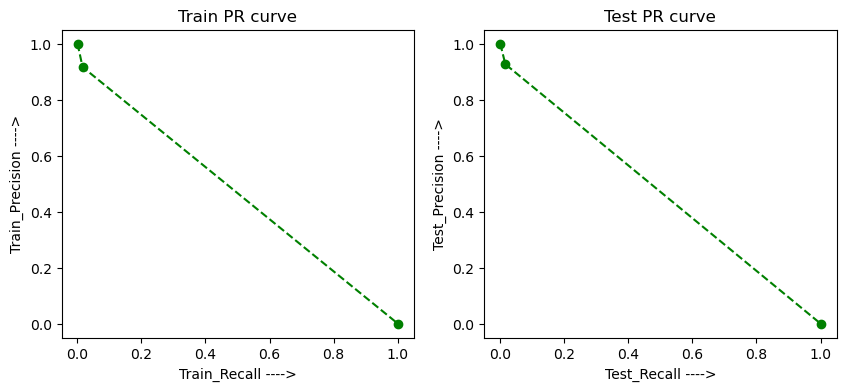

In [26]:
# Precision-Recall Curve of Train and Test:

plt.figure(figsize=(10,4),dpi=100)

train_precision, train_recall, train_thresholds = precision_recall_curve(y_train, y_train_pred)
test_precision, test_recall, test_thresholds = precision_recall_curve(y_test, y_test_pred)

plt.subplot(1,2,1)
plt.plot(train_precision,train_recall,color='green', marker='o', linestyle='dashed')
plt.ylabel("Train_Precision ---->")
plt.xlabel("Train_Recall ---->")
plt.title("Train PR curve")

plt.subplot(1,2,2)
plt.plot(test_precision,test_recall,color='green', marker='o', linestyle='dashed')
plt.ylabel("Test_Precision ---->")
plt.xlabel("Test_Recall ---->")
plt.title("Test PR curve")

plt.show()

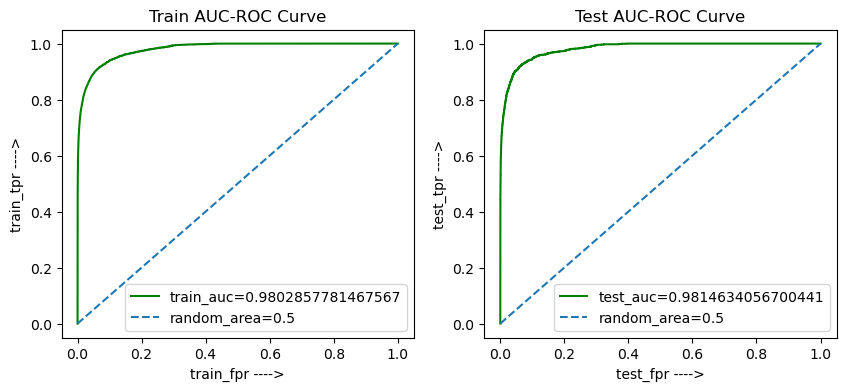

In [29]:
# AUC-ROC Curve of Train and Test:

plt.figure(figsize=(10,4),dpi=100)

train_fpr, train_tpr, train_thresholds= roc_curve(y_train,  log_reg.predict_proba(X_train_trf)[:,1])
test_fpr, test_tpr, test_thresholds= roc_curve(y_test,  log_reg.predict_proba(X_test_trf)[:,1])

train_auc = roc_auc_score(y_train, log_reg.predict_proba(X_train_trf)[:,1])
test_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test_trf)[:,1])

plt.subplot(1,2,1)
plt.plot(train_fpr,train_tpr,label="train_auc="+str(train_auc),color='green')
plt.plot([0,1],[0,1],label='random_area='+str(0.5),linestyle='--')
plt.legend(loc=4)
plt.title("Train AUC-ROC Curve")
plt.xlabel("train_fpr ---->")
plt.ylabel("train_tpr ---->")

plt.subplot(1,2,2)
plt.plot(test_fpr,test_tpr,label="test_auc="+str(test_auc),color='green')
plt.plot([0,1],[0,1],label='random_area='+str(0.5),linestyle='--')
plt.legend(loc=4)
plt.title("Test AUC-ROC Curve")
plt.xlabel("test_fpr ---->")
plt.ylabel("test_tpr ---->")

plt.show()

# -----------THE END--------------